In [32]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

dtype = torch.float

In [33]:
n = 20
df = pd.DataFrame()
df['x'] = np.linspace(500,1000,num=n)
noise = (np.random.random(size=n)-0.5)*100 # zero-centered noise
df['y'] = 2 * df.x + 5 + noise
df.head(10)

,x,y
0,500.000000,963.054506
1,526.315789,1028.183400
2,552.631579,1140.282233
3,578.947368,1180.941269
4,605.263158,1174.390188
5,631.578947,1270.329403
6,657.894737,1288.676407
7,684.210526,1387.753272
8,710.526316,1475.394066
9,736.842105,1501.004630


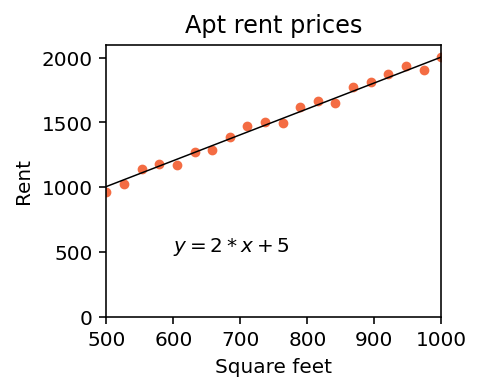

In [34]:
fig, ax = plt.subplots(figsize=(3,2.5))

ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, 2 * df.x + 5, lw=.75, color='black')
ax.text(600,500, f"$y = 2*x + 5$")
ax.set_xlim(500,1000)
ax.set_ylim(0,2100)
ax.set_xlabel("Square feet")
ax.set_ylabel("Rent")
plt.title("Apt rent prices")

plt.show()

$y = \fbox{m} x + \fbox{b}$

or multiple

In [35]:
# brute force model parameter space search (m,b)
best = (1e100,0,0)
for m in np.linspace(1,3,num=5):
    for b in np.linspace(2,5,num=5):
        y = m * df.x + b
        mse = np.mean((y - df.y)**2)
        if mse < best[0]:
            best = (mse,m,b)
        print(f"{m:4.1f},{b:4.1f} => MSE {mse:.1f}")
print(f"BEST {best[1]:.2f}*x + {best[2]:.2f}")

 1.0, 2.0 => MSE 596452.1
 1.0, 2.8 => MSE 595319.8
 1.0, 3.5 => MSE 594188.6
 1.0, 4.2 => MSE 593058.5
 1.0, 5.0 => MSE 591929.6
 1.5, 2.0 => MSE 152348.1
 1.5, 2.8 => MSE 151778.2
 1.5, 3.5 => MSE 151209.5
 1.5, 4.2 => MSE 150641.9
 1.5, 5.0 => MSE 150075.5
 2.0, 2.0 => MSE 1007.1
 2.0, 2.8 => MSE 999.8
 2.0, 3.5 => MSE 993.6
 2.0, 4.2 => MSE 988.5
 2.0, 5.0 => MSE 984.5
 2.5, 2.0 => MSE 142429.3
 2.5, 2.8 => MSE 142984.5
 2.5, 3.5 => MSE 143540.8
 2.5, 4.2 => MSE 144098.2
 2.5, 5.0 => MSE 144656.8
 3.0, 2.0 => MSE 576614.7
 3.0, 2.8 => MSE 577732.4
 3.0, 3.5 => MSE 578851.2
 3.0, 4.2 => MSE 579971.1
 3.0, 5.0 => MSE 581092.1
BEST 2.00*x + 5.00


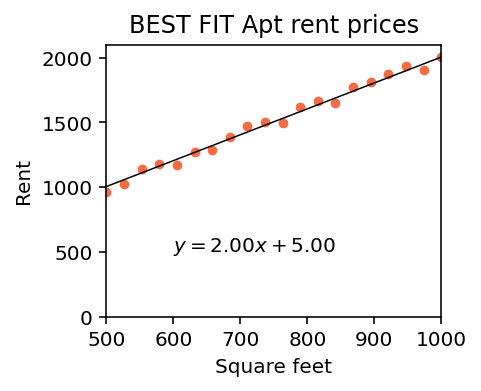

In [36]:
fig, ax = plt.subplots(figsize=(3,2.5))

ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, best[1] * df.x + best[2], lw=.75, color='black')
ax.text(600,500, f"$y = {best[1]:.2f}x + {best[2]:.2f}$")
ax.set_xlim(500,1000)
ax.set_ylim(0,2100)
ax.set_xlabel("Square feet")
ax.set_ylabel("Rent")
plt.title("BEST FIT Apt rent prices")

plt.show()

## Nonlinear data

Try multiple linear models and run output into another linear model

In [40]:
# brute force model parameter space search (m1,b1,m2,b2,c1,c2)
best = 1e100
for m1 in np.linspace(1,3,num=5):
    for b1 in np.linspace(0,10,num=5):
        for m2 in np.linspace(1,3,num=5):
            for b2 in np.linspace(0,10,num=5):
                for c1 in np.linspace(-1,1,num=3):
                    for c2 in np.linspace(-1,1,num=3):
                        for b3 in np.linspace(0,1,num=2):
                            for b4 in np.linspace(0,1,num=2):
                                y1 = m1 * df.x + b1
                                y2 = m2 * df.x + b2
                                y  = (c1*y1 + b3) + (c2*y2 + b4)
                                mse = np.mean((y - df.y)**2)
                                if mse < best:
                                    best = mse
                                    print(f"Best {m1:4.1f},{b1:4.1f},{m2:4.1f},{b2:4.1f},{c1:4.1f},{b3:4.1f},{b4:4.1f},{c2:4.1f} => MSE {mse:.1f}")

Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 0.0,-1.0 => MSE 11412715.2
Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 1.0,-1.0 => MSE 11406037.2
Best  1.0, 0.0, 1.0, 0.0,-1.0, 1.0, 1.0,-1.0 => MSE 11399361.2
Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 0.0, 0.0 => MSE 6896895.8
Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 1.0, 0.0 => MSE 6891717.8
Best  1.0, 0.0, 1.0, 0.0,-1.0, 1.0, 1.0, 0.0 => MSE 6886541.8
Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 0.0, 1.0 => MSE 3552128.9
Best  1.0, 0.0, 1.0, 0.0,-1.0, 0.0, 1.0, 1.0 => MSE 3548450.9
Best  1.0, 0.0, 1.0, 0.0,-1.0, 1.0, 1.0, 1.0 => MSE 3544774.9
Best  1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0 => MSE 1378414.7
Best  1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0 => MSE 1376236.7
Best  1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0 => MSE 1374060.7
Best  1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0 => MSE 375753.1
Best  1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0 => MSE 375075.1
Best  1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0 => MSE 374399.1
Best  1.0, 0.0, 1.0, 2.5, 1.0, 0.0, 0.0, 1.0 => MSE 374061.9
Best  1.0

KeyboardInterrupt: 

## Pytorch

### Noisy linear data

In [41]:
n = 20
df = pd.DataFrame()
df['x'] = np.linspace(500,1000,num=n)
noise = (np.random.random(size=n)-0.5)*100 # zero-centered noise
df['y'] = 2 * df.x + 5 + noise
df.head(10)

,x,y
0,500.000000,982.488300
1,526.315789,1027.598277
2,552.631579,1100.974265
3,578.947368,1211.706840
4,605.263158,1223.949074
5,631.578947,1279.627827
6,657.894737,1293.454773
7,684.210526,1327.154949
8,710.526316,1468.306768
9,736.842105,1483.384891


In [45]:
import torch
import tsensor

X = torch.tensor(df.x).reshape(n,1)
Y = torch.tensor(df.y).reshape(n,1)

# Randomly initialize weights
m = torch.randn(1, 1, requires_grad=True)  # <-- track for autograd
b = torch.randn(1, 1, requires_grad=True)

tolerance = 809
learning_rate = .001
optimizer = torch.optim.Adam([m,b], lr=learning_rate)
nepochs=50000
for epoch in range(nepochs+1):
    # Forward pass over all x,y pairs: compute predicted y
    with tsensor.clarify():
        y_pred = m * X + b
#         y_pred = y_pred.T
        loss = torch.mean((y_pred - Y)**2)
    if loss < tolerance:
        break
    if epoch % 500 == 0:
        with torch.no_grad():
            mae = torch.mean(torch.abs(y_pred - Y))
            print(f"Epoch {epoch:5d} {m.detach().item():4.2f},{b.detach().item():4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

    # Backprop to compute gradients of w1, w2, ... with respect to loss
    optimizer.zero_grad()
    loss.backward() # autograd computes w1.grad, b1.grad, ...
    optimizer.step()
m = m.detach().item()
b = b.detach().item()
print(f"LAST       {m:4.2f},{b:4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

Epoch     0 0.65,0.44: MSE loss  1081282.351 MAE  1018.49
Epoch   500 1.10,0.89: MSE loss   476499.093 MAE   675.66
Epoch  1000 1.46,1.25: MSE loss   172023.735 MAE   405.20
Epoch  1500 1.72,1.51: MSE loss    46970.438 MAE   210.22
Epoch  2000 1.88,1.67: MSE loss     9096.827 MAE    88.86
Epoch  2500 1.96,1.75: MSE loss     1665.786 MAE    31.24
Epoch  3000 1.99,1.78: MSE loss      851.284 MAE    25.18
Epoch  3500 2.00,1.79: MSE loss      809.071 MAE    25.02
LAST       2.00,1.79: MSE loss      808.998 MAE    25.02


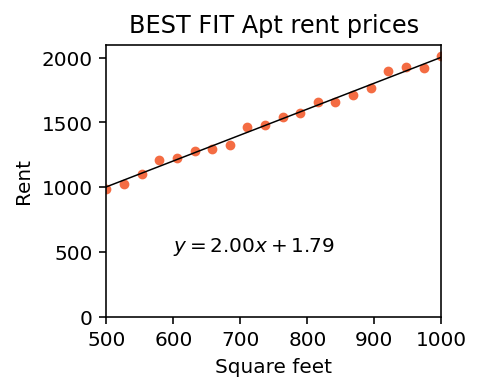

In [46]:
fig, ax = plt.subplots(figsize=(3,2.5))

ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, m * df.x + b, lw=.75, color='black')
ax.text(600,500, f"$y = {m:.2f}x + {b:.2f}$")
ax.set_xlim(500,1000)
ax.set_ylim(0,2100)
ax.set_xlabel("Square feet")
ax.set_ylabel("Rent")
plt.title("BEST FIT Apt rent prices")

plt.show()

## Cars

In [47]:
df_cars = pd.read_csv("../data/cars.csv")
df_cars.head(2)

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693


#### Brute force

In [85]:
# brute force model parameter space search (m,b)
best = (1e100,0,0)
for m in np.linspace(-0.005,-.01,num=100):
    for b in np.linspace(42,47,num=10):
        y = m * df_cars.WGT + b
        mse = np.mean((y - df_cars.MPG)**2)
        if mse < best[0]:
            best = (mse,m,b)
#         print(f"{m:4.3f},{b:4.3f} => MSE {mse:.1f}")
m = best[1]
b = best[2]
print(f"BEST {m:.3f}*x + {b:.3f}")

BEST -0.008*x + 46.444


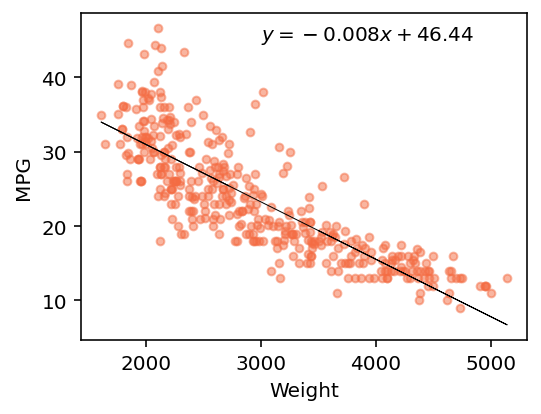

In [86]:
fig, ax = plt.subplots(figsize=(4,3))

ax.scatter(df_cars.WGT, df_cars.MPG, s=15, color='#F46C43', alpha=.5)
ax.plot(df_cars.WGT, m * df_cars.WGT + b, lw=.5, color='black')
ax.text(3000,45, f"$y = {m:.3f}x + {b:.2f}$")
# ax.set_xlim(500,1000)
# ax.set_ylim(0,2100)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")

plt.show()

#### Linear model with pytorch

In [87]:
import torch
import tsensor

n = len(df_cars)
X = torch.tensor(df_cars.WGT).reshape(n,1)
Y = torch.tensor(df_cars.MPG).reshape(n,1)

# Randomly initialize weights
m = torch.randn(1, 1, requires_grad=True)  # <-- track for autograd
b = torch.randn(1, 1, requires_grad=True)

tolerance = 18.7
learning_rate = .03
optimizer = torch.optim.Adam([m,b], lr=learning_rate)
nepochs=50000
for epoch in range(nepochs+1):
    # Forward pass over all x,y pairs: compute predicted y
    with tsensor.clarify():
        y_pred = m * X + b
#         y_pred = y_pred.T
        loss = torch.mean((y_pred - Y)**2)
    if loss < tolerance:
        break
    if epoch % 500 == 0:
        with torch.no_grad():
            mae = torch.mean(torch.abs(y_pred - Y))
            print(f"Epoch {epoch:5d} {m.detach().item():4.2f},{b.detach().item():4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

    # Backprop to compute gradients of w1, w2, ... with respect to loss
    optimizer.zero_grad()
    loss.backward() # autograd computes w1.grad, b1.grad, ...
    optimizer.step()
m = m.detach().item()
b = b.detach().item()
print(f"LAST       {m:4.2f},{b:4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

Epoch     0 -0.08,0.69: MSE loss    72215.497 MAE   261.55
Epoch   500 0.01,2.46: MSE loss      162.425 MAE    10.82
Epoch  1000 0.00,5.69: MSE loss      141.953 MAE    10.07
Epoch  1500 0.00,9.99: MSE loss      117.198 MAE     9.09
Epoch  2000 0.00,15.04: MSE loss       91.634 MAE     7.96
Epoch  2500 0.00,20.53: MSE loss       68.193 MAE     6.78
Epoch  3000 -0.00,26.13: MSE loss       48.982 MAE     5.64
Epoch  3500 -0.00,31.46: MSE loss       35.016 MAE     4.61
Epoch  4000 -0.00,36.04: MSE loss       26.450 MAE     3.87
Epoch  4500 -0.01,39.38: MSE loss       22.188 MAE     3.47
Epoch  5000 -0.01,41.69: MSE loss       20.220 MAE     3.33
Epoch  5500 -0.01,43.27: MSE loss       19.329 MAE     3.27
Epoch  6000 -0.01,44.32: MSE loss       20.553 MAE     3.36
Epoch  6500 -0.01,45.00: MSE loss       18.788 MAE     3.26
Epoch  7000 -0.01,45.44: MSE loss       18.722 MAE     3.26
LAST       -0.01,45.66: MSE loss       18.700 MAE     3.26


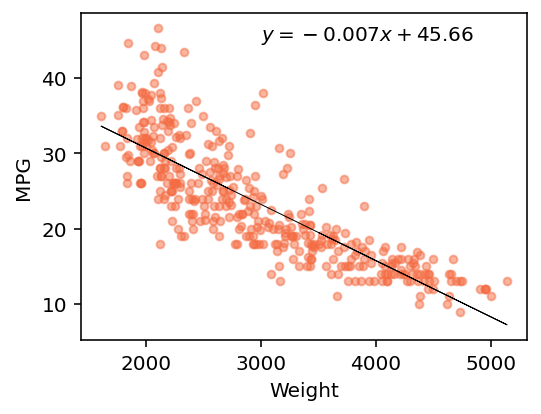

In [88]:
fig, ax = plt.subplots(figsize=(4,3))

ax.scatter(df_cars.WGT, df_cars.MPG, s=15, color='#F46C43', alpha=.5)
ax.plot(df_cars.WGT, m * df_cars.WGT + b, lw=.5, color='black')
ax.text(3000,45, f"$y = {m:.3f}x + {b:.2f}$")
# ax.set_xlim(500,1000)
# ax.set_ylim(0,2100)
ax.set_xlabel("Weight")
ax.set_ylabel("MPG")

plt.show()

### Concave down one layer of one neuron

Predicts line at angle, sometimes flat. MSE is about 3ish

In [16]:
n = 20
df = pd.DataFrame()
df['x'] = np.linspace(500,1000,num=n)
df['y'] = ((1-(df.x-750)**2)/50 + 1250)/1250
df.head(10)

,x,y
0,500.000000,0.000016
1,526.315789,0.199462
2,552.631579,0.376747
3,578.947368,0.531872
4,605.263158,0.664836
5,631.578947,0.775639
6,657.894737,0.864282
7,684.210526,0.930764
8,710.526316,0.975085
9,736.842105,0.997246


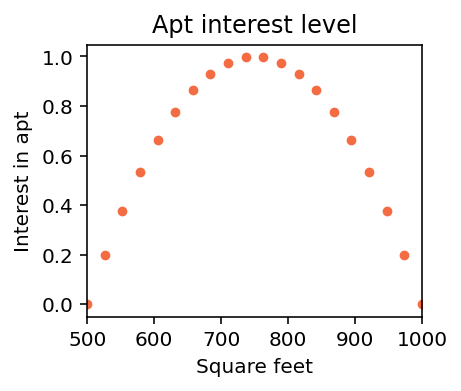

In [17]:
fig, ax = plt.subplots(figsize=(3,2.5))

ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.set_xlim(500,1000)
ax.set_xlabel("Square feet")
ax.set_ylabel("Interest in apt")
plt.title("Apt interest level")

plt.show()

In [18]:
import torch
import tsensor

X = torch.tensor(df.x).reshape(n,1)
Y = torch.tensor(df.y).reshape(n,1)

# Randomly initialize weights
m = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

tolerance = 3.15
learning_rate = .001
optimizer = torch.optim.Adam([m,b], lr=learning_rate)
nepochs=15000
for epoch in range(nepochs+1):
    # Forward pass over all x,y pairs: compute predicted y
    with tsensor.clarify():
        y_pred = m * X + b
        loss = torch.mean((y_pred - Y)**2)
    if loss < tolerance:
        break
    if epoch % 200 == 0:
        with torch.no_grad():
            mae = torch.mean(torch.abs(y_pred - Y))
            print(f"Epoch {epoch:5d} {m.detach().item():4.2f},{b.detach().item():4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

    # Backprop to compute gradients of w1, w2, ... with respect to loss
    optimizer.zero_grad()
    loss.backward() # autograd computes w1.grad, b1.grad, ...
    optimizer.step()
m = m.detach().item()
b = b.detach().item()
print(f"LAST        {m:4.2f},{b:4.2f}: MSE loss {loss:12.3f} MAE {mae:8.2f}")

Epoch     0 -0.94,1.46: MSE loss   514785.283 MAE   703.20
Epoch   200 -0.75,1.65: MSE loss   326283.486 MAE   559.83
Epoch   400 -0.58,1.82: MSE loss   195433.882 MAE   433.25
Epoch   600 -0.43,1.96: MSE loss   109483.309 MAE   324.26
Epoch   800 -0.31,2.08: MSE loss    56670.994 MAE   233.27
Epoch  1000 -0.22,2.18: MSE loss    26744.427 MAE   160.23
Epoch  1200 -0.14,2.26: MSE loss    11345.625 MAE   104.34
Epoch  1400 -0.09,2.31: MSE loss     4264.673 MAE    63.94
Epoch  1600 -0.05,2.35: MSE loss     1400.041 MAE    36.60
Epoch  1800 -0.03,2.37: MSE loss      395.665 MAE    19.42
Epoch  2000 -0.01,2.38: MSE loss       94.902 MAE     9.47
Epoch  2200 -0.01,2.39: MSE loss       19.122 MAE     4.19
Epoch  2400 -0.00,2.39: MSE loss        3.314 MAE     1.66
LAST        -0.00,2.39: MSE loss        3.141 MAE     1.66


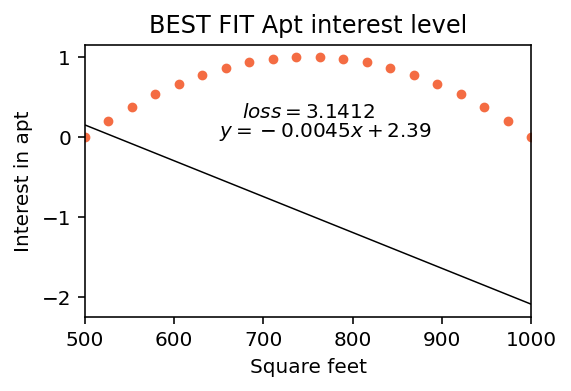

In [19]:
fig, ax = plt.subplots(figsize=(4,2.5))

y_pred = m * df.x + b
        
ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, y_pred, lw=.75, color='black')
ax.text(650,0, f"$y = {m:4.4f}x+{b:4.2f}$")
ax.text(750,.25, f"$loss = {loss:.4f}$", horizontalalignment="center")
ax.set_xlim(500,1000)
# ax.set_ylim(-.1,1.05)
ax.set_xlabel("Square feet")
ax.set_ylabel("Interest in apt")
plt.title("BEST FIT Apt interest level")

plt.show()

### Concave down two layers, two neurons then one neuron

Should predict flat line at mean (ish?). Seems to get flat line more often and with less loss than one neuron.

In [20]:
n = 20
df = pd.DataFrame()
df['x'] = np.linspace(500,1000,num=n)
df['y'] = ((1-(df.x-750)**2)/50 + 1250)/1250
df.head(3)

,x,y
0,500.000000,0.000016
1,526.315789,0.199462
2,552.631579,0.376747


In [21]:
import torch
import tsensor

X = torch.tensor(df.x, dtype=dtype).reshape(n,1)
Y = torch.tensor(df.y, dtype=dtype).reshape(n,1)

# Randomly initialize weights
m1 = torch.randn(2, 1, dtype=dtype, requires_grad=True) # 2 neurons in layer 1
b1 = torch.randn(2, 1, dtype=dtype, requires_grad=True)
m2 = torch.randn(1, 2, dtype=dtype, requires_grad=True) # 1 neuron in layer 2
b2 = torch.randn(1, 1, dtype=dtype, requires_grad=True)

tolerance = 0
learning_rate = .001
optimizer = torch.optim.Adam([m1,b1,m2,b2], lr=learning_rate)
nepochs=15000
for epoch in range(nepochs+1):
    # Forward pass over all x,y pairs: compute predicted y
    with tsensor.clarify():
        o = m1 @ X.T + b1
        o = torch.relu(o)
        y_pred = m2 @ o + b2
        y_pred = y_pred.T
        loss = torch.mean((y_pred - Y)**2)
    if loss < tolerance:
        break
    if epoch % 1000 == 0:
        with torch.no_grad():
            mae = torch.mean(torch.abs(y_pred - Y))
            print(f"Epoch {epoch:5d} {m1.detach().numpy()},{b1.detach().numpy()}, {m2.detach().numpy()},{b2.detach().numpy()}: MSE loss {loss.detach().item():12.4f} MAE {mae:8.2f}")

    # Backprop to compute gradients of w1, w2, ... with respect to loss
    optimizer.zero_grad()
    loss.backward() # autograd computes w1.grad, b1.grad, ...
    optimizer.step()
m1 = m1.detach()
b1 = b1.detach()
m2 = m2.detach()
b2 = b2.detach()
print(f"LAST        {m1.detach().numpy()},{b1.detach().numpy()}, {m2.detach().numpy()},{b2.detach().numpy()}: MSE loss {loss.detach().item():12.4f} MAE {mae:8.2f}")

Epoch     0 [[ 0.25307852]
 [-1.2872828 ]],[[ 2.1666398]
 [-0.7841551]], [[-0.49332947 -0.08113587]],[[0.89620453]]: MSE loss    9278.4385 MAE    94.44
Epoch  1000 [[ 4.8588309e-04]
 [-1.2872828e+00]],[[ 1.9140058]
 [-0.7841551]], [[-0.32318646 -0.08113587]],[[1.1903282]]: MSE loss       0.1399 MAE     0.33
Epoch  2000 [[-2.3177663e-04]
 [-1.2872828e+00]],[[ 1.9131844]
 [-0.7841551]], [[-0.32317376 -0.08113587]],[[1.1914257]]: MSE loss       0.1079 MAE     0.28
Epoch  3000 [[-2.3044820e-04]
 [-1.2872828e+00]],[[ 1.912984 ]
 [-0.7841551]], [[-0.32317376 -0.08113587]],[[1.1916946]]: MSE loss       0.1079 MAE     0.28
Epoch  4000 [[-2.2827541e-04]
 [-1.2872828e+00]],[[ 1.9126554]
 [-0.7841551]], [[-0.32317376 -0.08113587]],[[1.192137]]: MSE loss       0.1079 MAE     0.28
Epoch  5000 [[-2.2466475e-04]
 [-1.2872828e+00]],[[ 1.9120997]
 [-0.7841551]], [[-0.32317376 -0.08113587]],[[1.1928675]]: MSE loss       0.1079 MAE     0.28
Epoch  6000 [[-2.1872556e-04]
 [-1.2872828e+00]],[[ 1.911209 ]
 

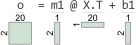

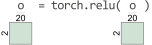

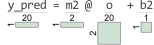

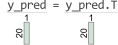

Loss tensor(0.1078)


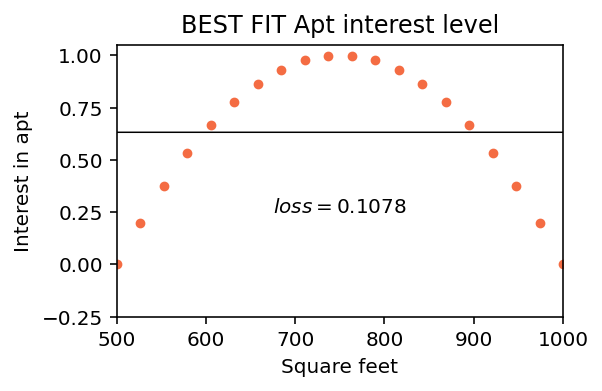

In [22]:
fig, ax = plt.subplots(figsize=(4,2.5))

with tsensor.explain():
    o = m1 @ X.T + b1
    o = torch.relu(o)
    y_pred = m2 @ o + b2
    y_pred = y_pred.T

loss = torch.mean((y_pred - Y)**2)
print("Loss", loss)
        
ax.scatter(df.x, df.y, s=15, color='#F46C43')
ax.plot(df.x, y_pred, lw=.75, color='black')
# ax.text(525,-.18, f"$y = {m2:4.4f}*relu({m1:4.2f}x+{b1:4.2f}) + {b2:4.2f}$")
ax.text(750,.25, f"$loss = {loss:.4f}$", horizontalalignment="center")
ax.set_xlim(500,1000)
ax.set_ylim(-.25,1.05)
ax.set_xlabel("Square feet")
ax.set_ylabel("Interest in apt")
plt.title("BEST FIT Apt interest level")

plt.show()